In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import pandas as pd
import pandas as pd
#Punctuations
import string
#reg Expressions
import re
#emojis with description
import demoji
#sentences to words
from nltk.tokenize import TreebankWordTokenizer
#paras to sentences
from nltk.tokenize import sent_tokenize
#stopwords
from nltk.corpus import stopwords
#for converting word to vector
#import gensim.models.word2vec as w2v

In [2]:
%%time
tweet_data = pd.read_csv("IRAhandle_tweets_1.csv")

Wall time: 2.39 s


In [1]:
#tweet_data

In [4]:
account_category_dict = {}

# classify that the article has recommends
for i in range(len(tweet_data)):
    if tweet_data["account_category"][i] in account_category_dict.keys():
        account_category_dict[tweet_data["account_category"][i]] += 1
    else:
        account_category_dict.setdefault(tweet_data["account_category"][i], 1)

In [5]:
account_category_dict

{'RightTroll': 114810,
 'NonEnglish': 53038,
 'Fearmonger': 384,
 'LeftTroll': 36072,
 'Unknown': 608,
 'HashtagGamer': 27349,
 'NewsFeed': 11291,
 'Commercial': 339}

In [6]:
# I'll want to visualize how many articles have in each topic. 
account_category_list = list(account_category_dict.items())
account_category_list.sort(key=lambda x: x[1], reverse=True)

In [7]:
x = []
y = []
for i in range(len(account_category_list)):
    x.append(account_category_list[i][0])
    y.append(account_category_list[i][1])

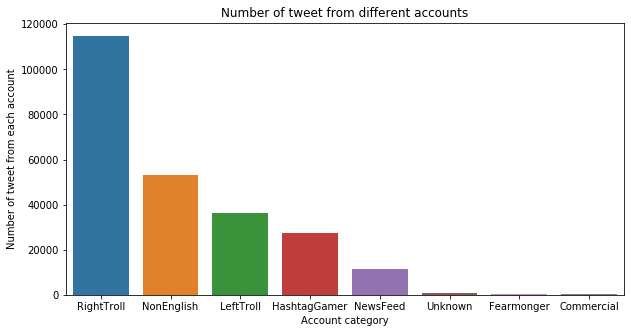

In [8]:
plt.figure(figsize=(10,5))
plt.title("Number of tweet from different accounts")
plt.xlabel("Account category")
plt.ylabel("Number of tweet from each account")
g=sns.barplot(x, y)

In [9]:
tweet_data['date'] = pd.to_datetime(tweet_data['publish_date'])
tweet_data['YEAR']=pd.to_datetime(tweet_data.date,format='%Y-%m-%d %H:%M:%S').dt.year

Text(0.5, 1.0, 'Variation of popular accounts category over the year')

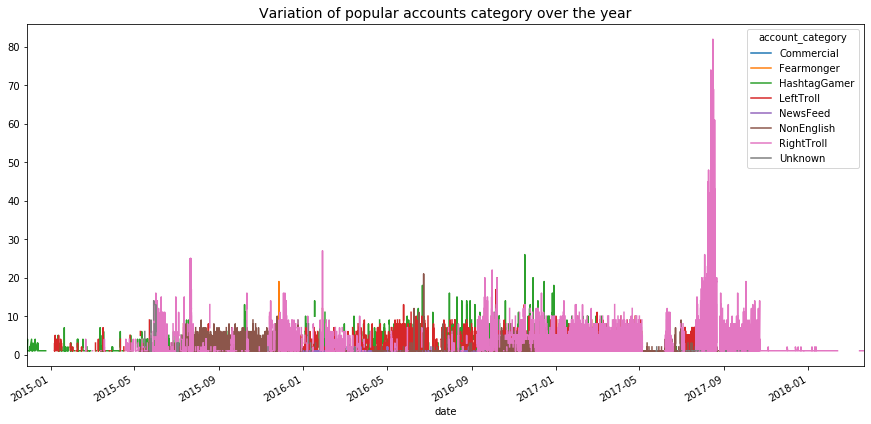

In [10]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
tweet_data.groupby(['date','account_category']).count()['content'].unstack().plot(ax=ax)
plt.title('Variation of popular accounts category over the time', fontsize=14)